## 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 21.1 MB/s eta 0:00:00


In [3]:
# !pip install koreanize-matplotlib
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

## 데이터 로드
* parquet 형식 로드를 위한 라이브러리가 설치되어 있어야 합니다.

In [4]:
df = pd.read_parquet("https://github.com/corazzon/KaggleStruggle/raw/master/online-retail/data/online_retail.gzip")
df.shape

(541909, 8)

In [5]:
# 주문 가격
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   InvoiceNo    541909 non-null  category
 1   StockCode    541909 non-null  category
 2   Description  540455 non-null  category
 3   Quantity     541909 non-null  int32   
 4   InvoiceDate  541909 non-null  category
 5   UnitPrice    541909 non-null  float64 
 6   CustomerID   406829 non-null  float32 
 7   Country      541909 non-null  category
 8   TotalPrice   541909 non-null  float64 
dtypes: category(5), float32(1), float64(2), int32(1)
memory usage: 19.3 MB


## 미션 1) 모집단과 표본 추출을 하고 TotalPrice에 대해 비교해 주세요.
데이터셋에서 무작위로 1000개의 표본을 추출하고, 추출된 표본과 전체 데이터셋의 'TotalPrice'에 대해 평균과 표준편차를 비교하세요. 이를 통해 모집단과 표본의 차이를 설명하고, 중심극한정리가 어떻게 적용되는지 설명하세요.

* pandas 의 sample 을 활용할 수 있으며, pandas 의 기술 통계 기능을 활용해 볼 수 있습니다.
* 참고 : 슬라이드에서 중심극한정리를 찾아보세요.

### 무작위로 1000개의 표본 추출

In [7]:
sample_df = df.sample(n=1000, random_state=42)
sample_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
209268,555200,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2011-06-01 12:05:00,0.85,17315.0,United Kingdom,20.40
207108,554974,21128,GOLD FISHING GNOME,4,2011-05-27 17:14:00,6.95,14031.0,United Kingdom,27.80
167085,550972,21086,SET/6 RED SPOTTY PAPER CUPS,4,2011-04-21 17:05:00,0.65,14031.0,United Kingdom,2.60
471836,576652,22812,PACK 3 BOXES CHRISTMAS PANETTONE,3,2011-11-16 10:39:00,1.95,17198.0,United Kingdom,5.85
115865,546157,22180,RETROSPOT LAMP,2,2011-03-10 08:40:00,9.95,13502.0,United Kingdom,19.90


### 모집단과 표본의 'TotalPrice'에 대한 평균 및 표준편차 계산

In [8]:
# 평균
population_mean = df['TotalPrice'].mean()
sample_mean = sample_df['TotalPrice'].mean()

print(f'population mean : {population_mean}')
print(f'sample mean : {sample_mean}')

population mean : 17.98779487699964
sample mean : 16.832069999999998


In [9]:
# 표준편차
population_std = df['TotalPrice'].std()
sample_std = sample_df['TotalPrice'].std()

print(f'population standard deviation : {population_std}')
print(f'sample standard deviation : {sample_std}')

population standard deviation : 378.8108235059747
sample standard deviation : 64.46732773087356


-  평균
  - 표본 평균은 모집단 평균에 비해 약간 작은 것으로 나타난다.
  - 이는 표본이 모집단을 완벽하게 대표하지 않아서 발생하는 차이일 수 있다.

- 표준편차
  - 표본 표준편차는 모집단 표준편차보다 현저히 작다.
  - 표본의 크기가 작고, 표본 표준편차가 모집단 표준편차의 추정치이기 때문에 이러한 차이가 발생할 수 있다.

- 중심극한정리 적용 여부
  - 중심극한정리는 표본의 크기가 클수록 표본 평균의 분포가 정규 분포에 가까워진다는 원리다.
  - 현재 표본의 크기가 얼마나 되는지에 따라 중심극한정리의 적용 여부가 결정된다.
  - 표본이 충분히 크다면, 표본 평균은 모집단 평균에 대한 좋은 추정치가 될 것이다.

## 미션2) 'Country' 변수를 바탕으로 가장 빈도가 높은 두 개의 국가를 선택하고, 각 국가의 'TotalPrice' 평균에 차이가 있는지 검증하세요. 독립표본 t-검정을 사용하여 가설을 설정하고 검정하며, 1종 오류와 2종 오류에 대해 설명하세요.


* 미션 진행 방법
    <br>1) 데이터 로드 후 'TotalPrice'와 'Country' 컬럼을 찾아주세요.
    <br>2) 데이터셋에서 주문이 가장 많은 상위 두 국가를 찾아주세요.
    <br>3) 통계적 검증 수행하기
    <br>4) 각 국가의 'TotalPrice' 평균을 계산하세요.
    <br>5) 독립표본 t-검정을 사용하여 두 국가 간 'TotalPrice' 평균의 차이가 통계적으로 유의미한지 검증하세요. 이 때, scipy.stats 라이브러리의 ttest_ind 함수를 사용할 수 있습니다. equal_var=False 파라미터를 설정하여 두 집단의 분산이 다르다고 가정하세요.
    <br>6) t-통계량과 p-값을 해석하여 결과를 설명하세요. 1종 오류와 2종 오류의 개념을 설명하고, 해당 데이터셋에 적용하여 설명해 주세요.

### 'TotalPrice'와 'Country' 컬럼 선택

In [10]:
subset_df = df[['TotalPrice', 'Country']]
subset_df.head()

,TotalPrice,Country
0,15.30,United Kingdom
1,20.34,United Kingdom
2,22.00,United Kingdom
3,20.34,United Kingdom
4,20.34,United Kingdom


### 가장 많은 주문이 일어난 상위 두 국가 찾기

In [11]:
subset_df['Country'].value_counts().head(2)

United Kingdom    495478
Germany             9495
Name: Country, dtype: int64

In [12]:
top_countries = subset_df['Country'].value_counts().head(2).index
top_countries

CategoricalIndex(['United Kingdom', 'Germany'], categories=['Australia', 'Austria', 'Bahrain', 'Belgium', ..., 'USA', 'United Arab Emirates', 'United Kingdom', 'Unspecified'], ordered=False, dtype='category')

### 상위 두 국가에 해당하는 데이터 추출

In [13]:
country_df = subset_df[subset_df['Country'].isin(top_countries)]
country_df.head()

,TotalPrice,Country
0,15.30,United Kingdom
1,20.34,United Kingdom
2,22.00,United Kingdom
3,20.34,United Kingdom
4,20.34,United Kingdom


### 각 국가의 'TotalPrice' 평균 계산

In [14]:
average_prices = country_df.groupby('Country')['TotalPrice'].mean()
average_prices[average_prices.notna()]

Country
Germany           23.348943
United Kingdom    16.525065
Name: TotalPrice, dtype: float64

### 독립표본 t-검정 수행

In [15]:
from scipy import stats

t_statistic, p_value = stats.ttest_ind(
    country_df[country_df['Country'] == top_countries[0]]['TotalPrice'],
    country_df[country_df['Country'] == top_countries[1]]['TotalPrice'],
    equal_var=False
)

print(f"T-통계량: {t_statistic}")
print(f"P-값: {p_value}")

T-통계량: -10.046360185819829
P-값: 9.823416115791871e-24


### 1종 오류와 2종 오류 설명

- 1종 오류: 귀무가설이 참일 때, 귀무가설을 기각하는 오류로, 잘못된 결론을 내릴 확률
- 2종 오류: 귀무가설이 거짓일 때, 귀무가설을 기각하지 않는 오류로, 올바른 결론을 내리지 못할 확률  
</br>

- T-통계량: 두 집단 간의 평균 차이를 표준 오차로 나눈 값
  - 'United Kingdom'과 'Germany' 두 국가 간의 'TotalPrice' 평균 차이
  - 음수 값이므로 'Germany'의 평균이 'United Kingdom'의 평균보다 작다.
- P-값: 귀무 가설이 참이라고 가정할 때, 관측된 통계량 값 이상이 나올 확률
  - 이 값이 매우 작다는 것은 귀무 가설을 기각할 충분한 증거가 있다는 것을 의미한다.
  - 여기서는 'United Kingdom'과 'Germany' 두 국가 간의 'TotalPrice' 평균 차이가 통계적으로 유의미하다.
</br>

- 1종 오류
  - P-값이 매우 작은 경우이므로 1종 오류의 위험이 낮다.
  - 즉, 'United Kingdom'과 'Germany' 간의 'TotalPrice' 평균 차이가 통계적으로 유의미한 것으로 나타났을 때, 실제로는 그 차이가 없는 경우는 드물다고 볼 수 있다.
- 2종 오류
  - P-값이 매우 작은 경우에는 2종 오류의 가능성이 낮아진다.
  - 따라서 'United Kingdom'과 'Germany' 간의 'TotalPrice' 평균 차이가 통계적으로 유의미하다고 나타난 경우, 이 차이가 실제로 존재하는 것으로 보는 것이 적절하다.

즉, 주어진 결과를 토대로 'United Kingdom'과 'Germany' 간의 'TotalPrice' 평균 차이가 통계적으로 유의미하며, 이 결과가 실제로는 존재하는 차이를 나타낼 가능성이 높다고 해석할 수 있다.

## 미션 3) 주중, 주말에 따른 기술통계와 분위수 분석

'UnitPrice'의 분포를 분석하기 위해 상자수염그림과 히스토그램을 그리세요. 데이터의 분위수, 중심경향치(평균, 중간값), 변산성(표준편차, 분산)을 계산하고, 이들이 데이터 분포에 대해 설명해 주세요. 다음의 주어진 코드를 활용해 주세요.


```python
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek


df.loc[df['DayOfWeek'] <= 4, "WeekEnd"] = "주중"
df.loc[df['DayOfWeek'] > 4, "WeekEnd"] = "주말"

# 주중(월요일=0, 화요일=1, ..., 금요일=4)과 주말(토요일=5, 일요일=6)으로 데이터를 분리
weekday_data = df[df['DayOfWeek'] <= 4]  # 주중
weekend_data = df[df['DayOfWeek'] > 4]   # 주말
```

* 참고 : [pandas.DataFrame.describe — pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
* 참고 : 슬라이드의 "기술 통계" 부분을 찾아보세요.

In [16]:
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek


df.loc[df['DayOfWeek'] <= 4, "WeekEnd"] = "주중"
df.loc[df['DayOfWeek'] > 4, "WeekEnd"] = "주말"


# 주중(월요일=0, 화요일=1, ..., 금요일=4)과 주말(토요일=5, 일요일=6)으로 데이터를 분리
weekday_data = df[df['DayOfWeek'] <= 4]  # 주중
weekend_data = df[df['DayOfWeek'] > 4]   # 주말

### 상자수염그림

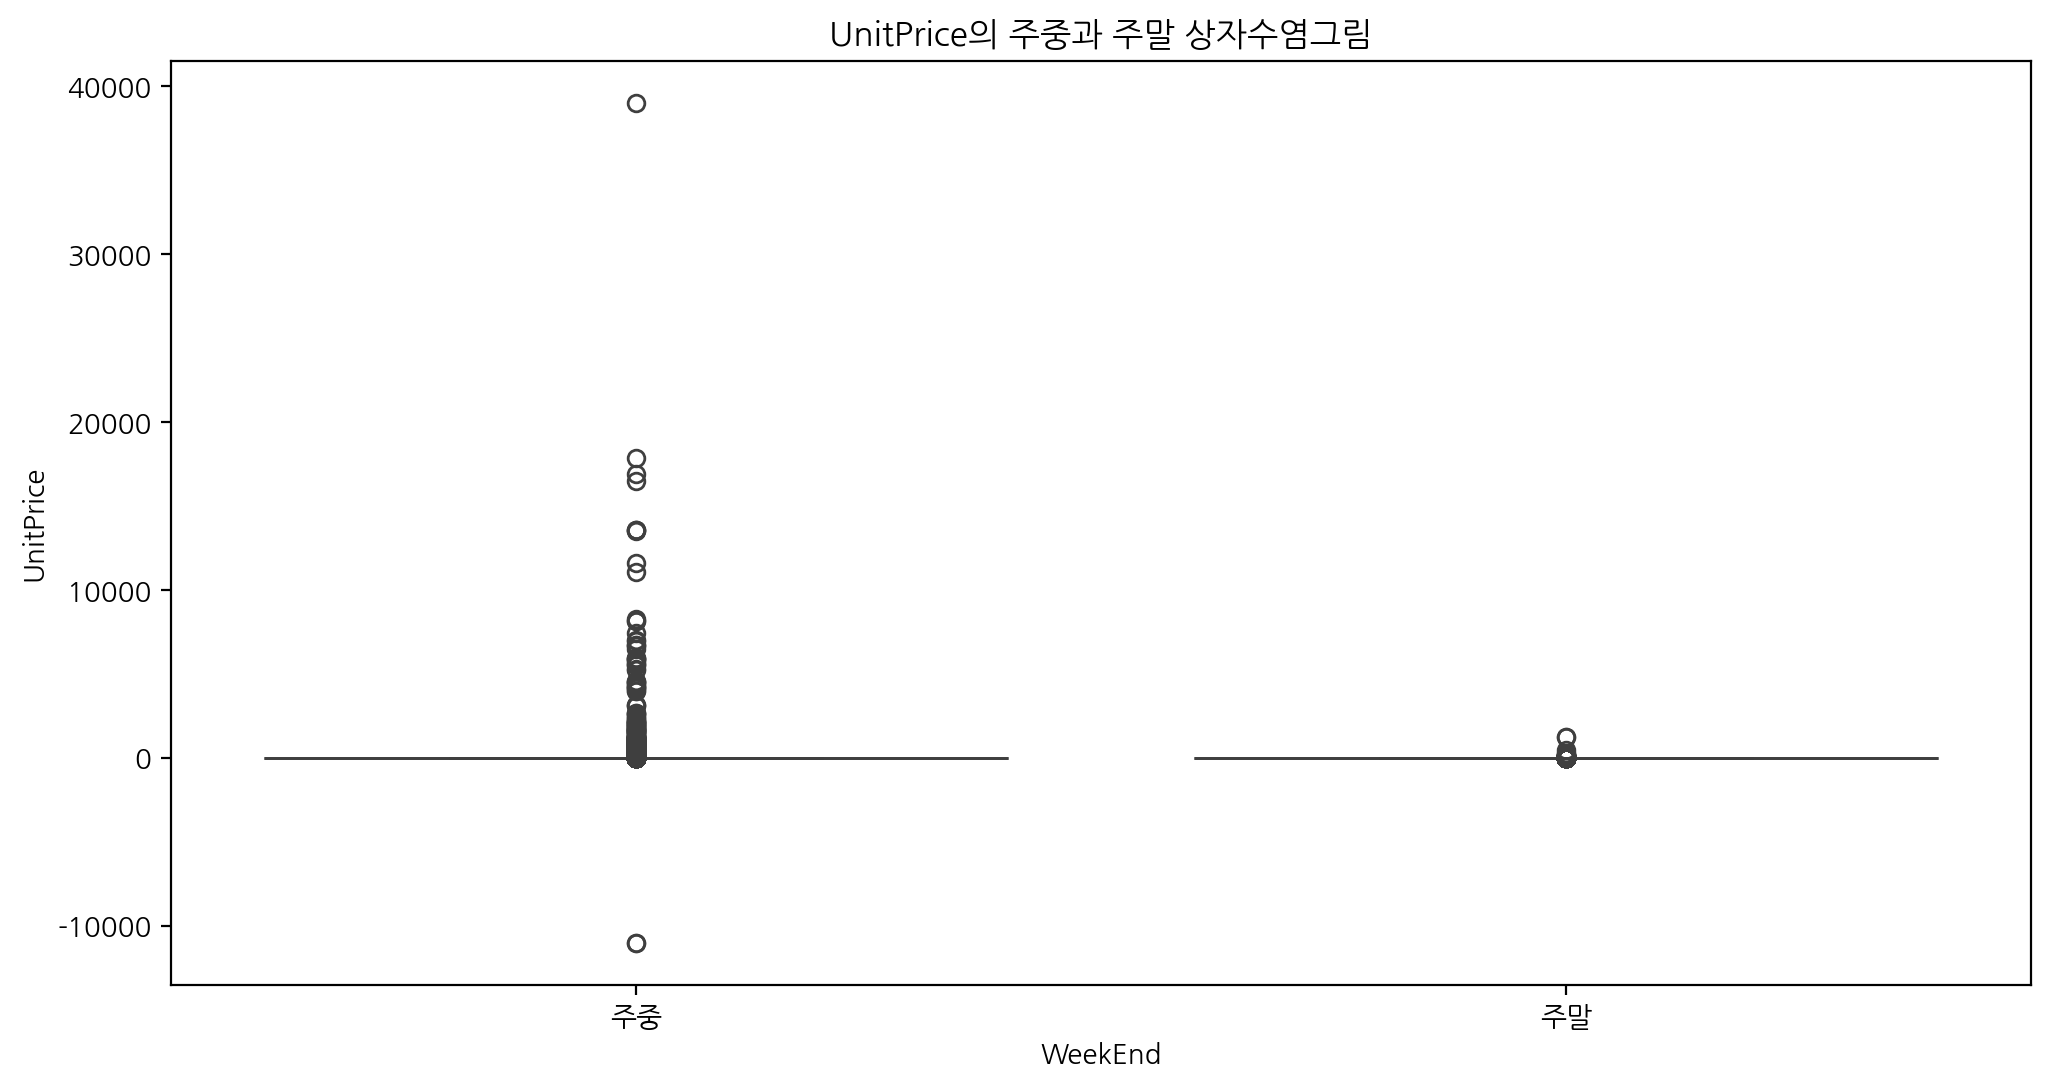

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='WeekEnd', y='UnitPrice', data=df)
plt.title('UnitPrice의 주중과 주말 상자수염그림')
plt.show()

### 히스토그램

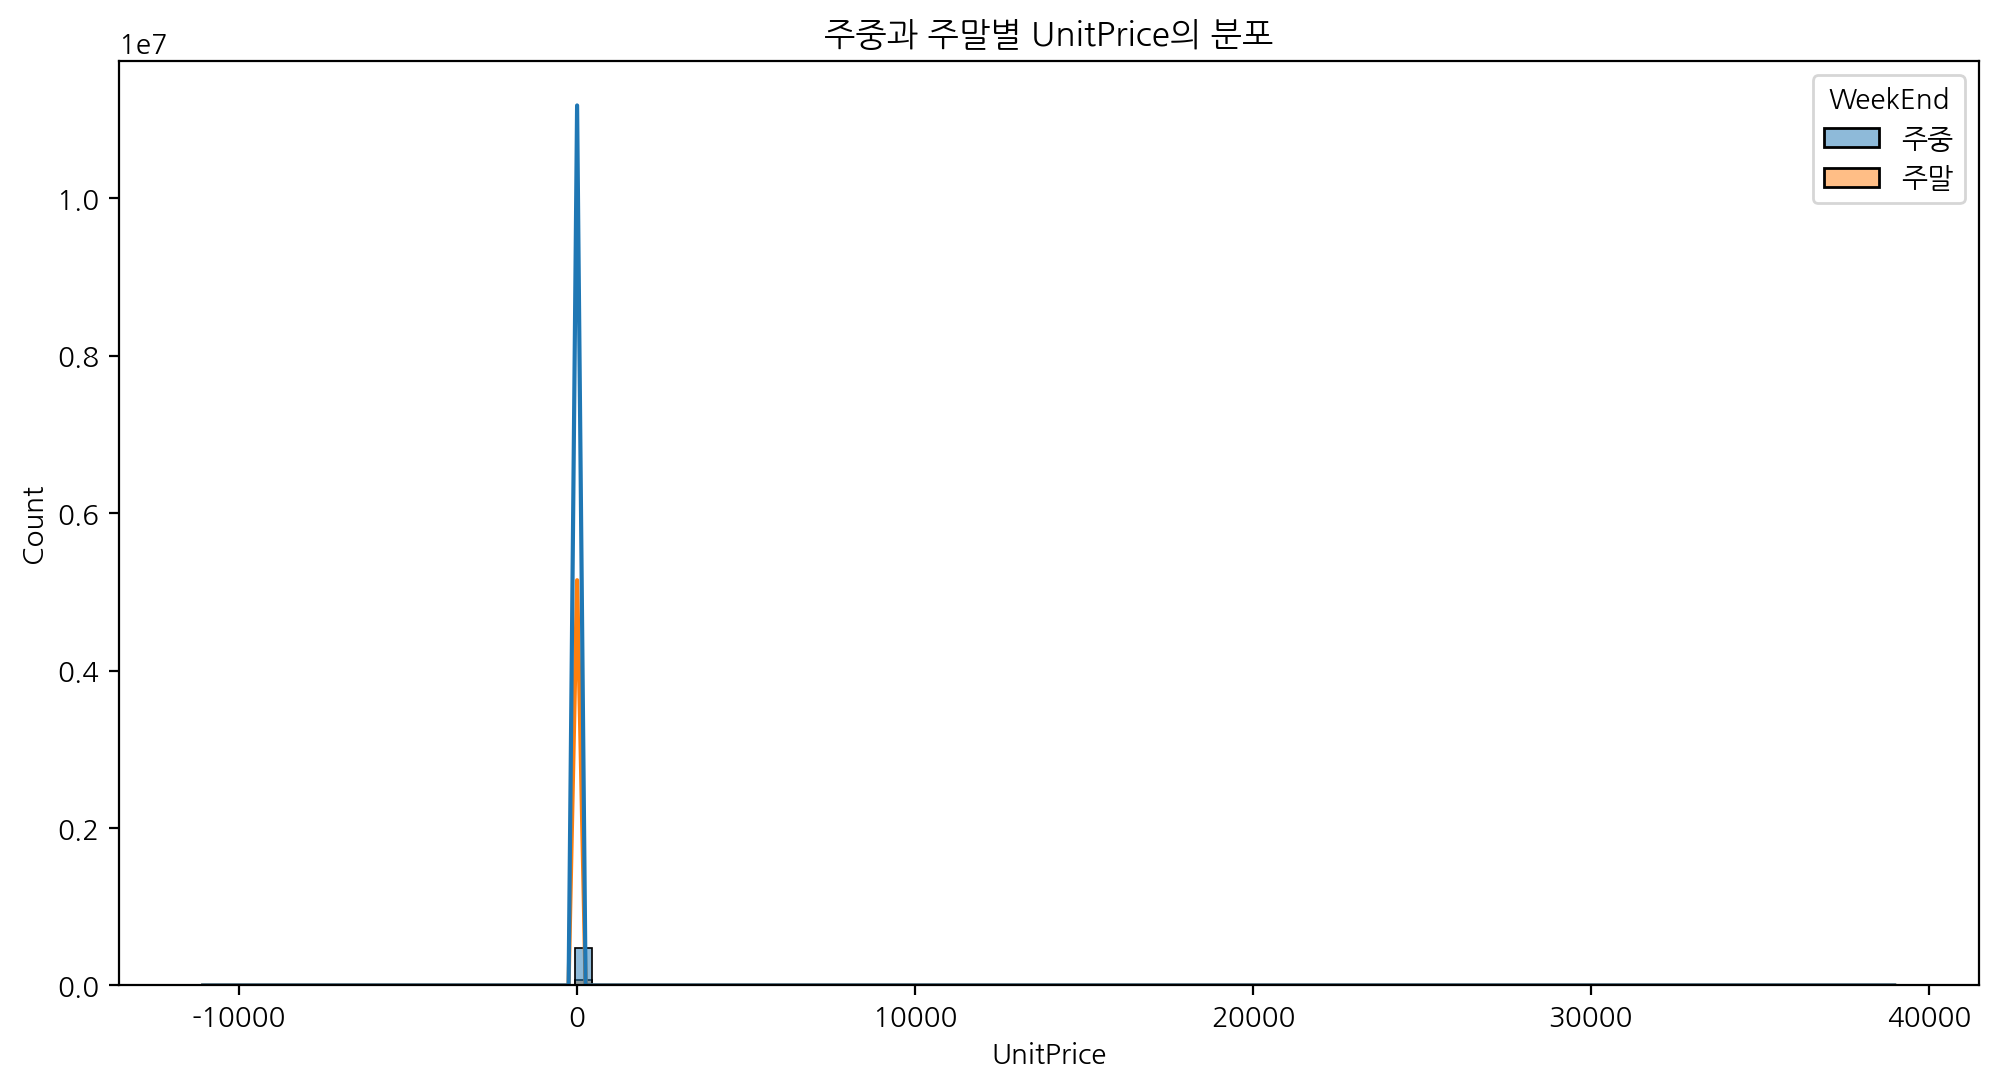

In [18]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='UnitPrice', hue='WeekEnd', kde=True, bins=100)
plt.title('주중과 주말별 UnitPrice의 분포')
plt.show()

### 주중과 주말에 대한 기술통계

In [19]:
df.groupby('WeekEnd')['UnitPrice'].describe()

,count,mean,std,min,25%,50%,75%,max
WeekEnd,,,,,,,,
주말,64375.0,2.887824,7.959497,0.00,1.25,1.85,3.75,1236.75
주중,477534.0,4.843425,103.032058,-11062.06,1.25,2.10,4.13,38970.00


- 주말과 주중의 UnitPrice 분포를 비교하면, 주중의 경우 평균 UnitPrice가 주말보다 상당히 높다.
- 표준편차도 주중이 더 크다
  - 이는 주중의 경우 이상치(outliers)나 큰 값들이 존재하여 분산이 크게 나타나는 것으로 해석될 수 있다.
- 주중의 경우 최소값이 음수이며, 최대값이 크게 나타나며, 주말에 비해 편차가 크다.
  - 이러한 값들은 데이터셋에 이상치가 존재할 가능성을 시사할 수 있다.

### 주중과 주말에 대한 분위수 분석

In [20]:
df.groupby('WeekEnd')['UnitPrice'].quantile([0.25, 0.5, 0.75])

WeekEnd      
주말       0.25    1.25
         0.50    1.85
         0.75    3.75
주중       0.25    1.25
         0.50    2.10
         0.75    4.13
Name: UnitPrice, dtype: float64

- 주말과 주중의 중간값(Q2)을 비교하면 주중이 더 높다.
  - 이는 중앙값을 기준으로 데이터의 중심 경향이 주중에서는 더 높게 나타난다는 것을 의미한다.
- 75% 백분위수(Q3)도 주중이 주말보다 더 높다.
  - 이는 주중의 데이터가 전반적으로 큰 값으로 퍼져있음을 시사한다.

## 미션4)  'TotalPrice'의 중간값이 특정 값과 다른지 검증하기 위해 비모수 검정 (예: 맨-휘트니 U-검정)을 사용하세요. 검증 결과에 대해 비즈니스 관점에서 분석해 주세요.

* 비모수 검정은 데이터가 정규 분포를 따르지 않거나, 정규 분포에 대한 가정을 할 수 없을 때 사용됩니다. 특히, 작은 표본 크기, 이상치의 존재, 순위나 순서와 같은 비정량적 데이터에 적합합니다. 또한, 두 그룹 간의 중앙값이나 분포의 형태가 다를 때 비모수 검정을 사용할 수 있습니다.

* 맨-휘트니 U-검정은 두 독립적인 표본 간에 중앙값의 차이를 비교하는 데 사용됩니다. 이 검정은 두 그룹의 데이터가 서로 독립적이며, 최소한 서열 척도로 측정되어야 합니다. 데이터의 분포 형태에 대한 가정이 필요 없으며, 크기가 다른 두 표본에 대해서도 사용할 수 있습니다. 이 검정은 데이터의 중앙값이 특정 값과 다른지 여부를 검증하는 데 유용합니다.

다음의 주어진 코드를 활용해 주세요.

```python
from scipy.stats import mannwhitneyu
# 'TotalPrice' 컬럼을 생성합니다. 이는 'Quantity'와 'UnitPrice'의 곱으로 정의됩니다.
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
```

* 참고 : https://www.ibm.com/docs/ko/spss-statistics/beta?topic=tests-mann-whitney-u-test

In [21]:
from scipy.stats import mannwhitneyu

# 'TotalPrice' 컬럼을 생성합니다. 이는 'Quantity'와 'UnitPrice'의 곱으로 정의됩니다.
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

### 중앙값 검정 수행


In [22]:
# 중앙값 설정
target_median = 500

statistic, p_value = mannwhitneyu(df['TotalPrice'], [target_median], alternative='two-sided')

print(f'Mann-Whitney U 통계량: {statistic}')
print(f'p-value: {p_value}')

Mann-Whitney U 통계량: 1158.0
p-value: 0.08457473278683238


### 유의수준 0.05에서 검정

In [23]:
alpha = 0.05
if p_value < alpha:
    print("귀무가설을 기각합니다. 중앙값이 특정 값과 다릅니다.")
else:
    print("귀무가설을 기각하지 않습니다. 중앙값이 특정 값과 다르지 않습니다.")

귀무가설을 기각하지 않습니다. 중앙값이 특정 값과 다르지 않습니다.


### 비즈니스 관점 분석

- 제품의 가격 또는 가격 전략에 대한 안정성을 평가할 수 있다.
  - 중앙값이 특정 값과 다르다는 결과는 'TotalPrice'의 중앙값이 설정한 값과 통계적으로 유의미한 차이가 있다.
  - 이는 제품의 가격 조정이나 마케팅 전략의 재평가가 필요할 수 있다.
- 예를 들어, 중앙값이 특정 금액보다 크다면 이는 제품 가격이나 주문량이 높은 구매 패턴을 나타낼 수 있다.
  - 이러한 통계적 분석은 마케팅 전략이나 재고 관리 등의 의사 결정에 도움을 줄 수 있다.

## 미션5) UnitPrice 컬럼에 대한 95% 신뢰구간을 구하고  seaborn 으로 신뢰구간을 시각화 해주세요. 그리고 이 신뢰구간이 비즈니스 결정에 어떻게 활용될 수 있는지 설명하세요.

### UnitPrice 컬럼에 대한 95% 신뢰구간 계산

In [24]:
from scipy import stats

confidence_interval = stats.norm.interval(0.95, loc=df['UnitPrice'].mean(), scale=df['UnitPrice'].std())
confidence_interval

(-185.03471352321077, 194.25694077538782)

### Seaborn을 사용하여 신뢰구간 시각화

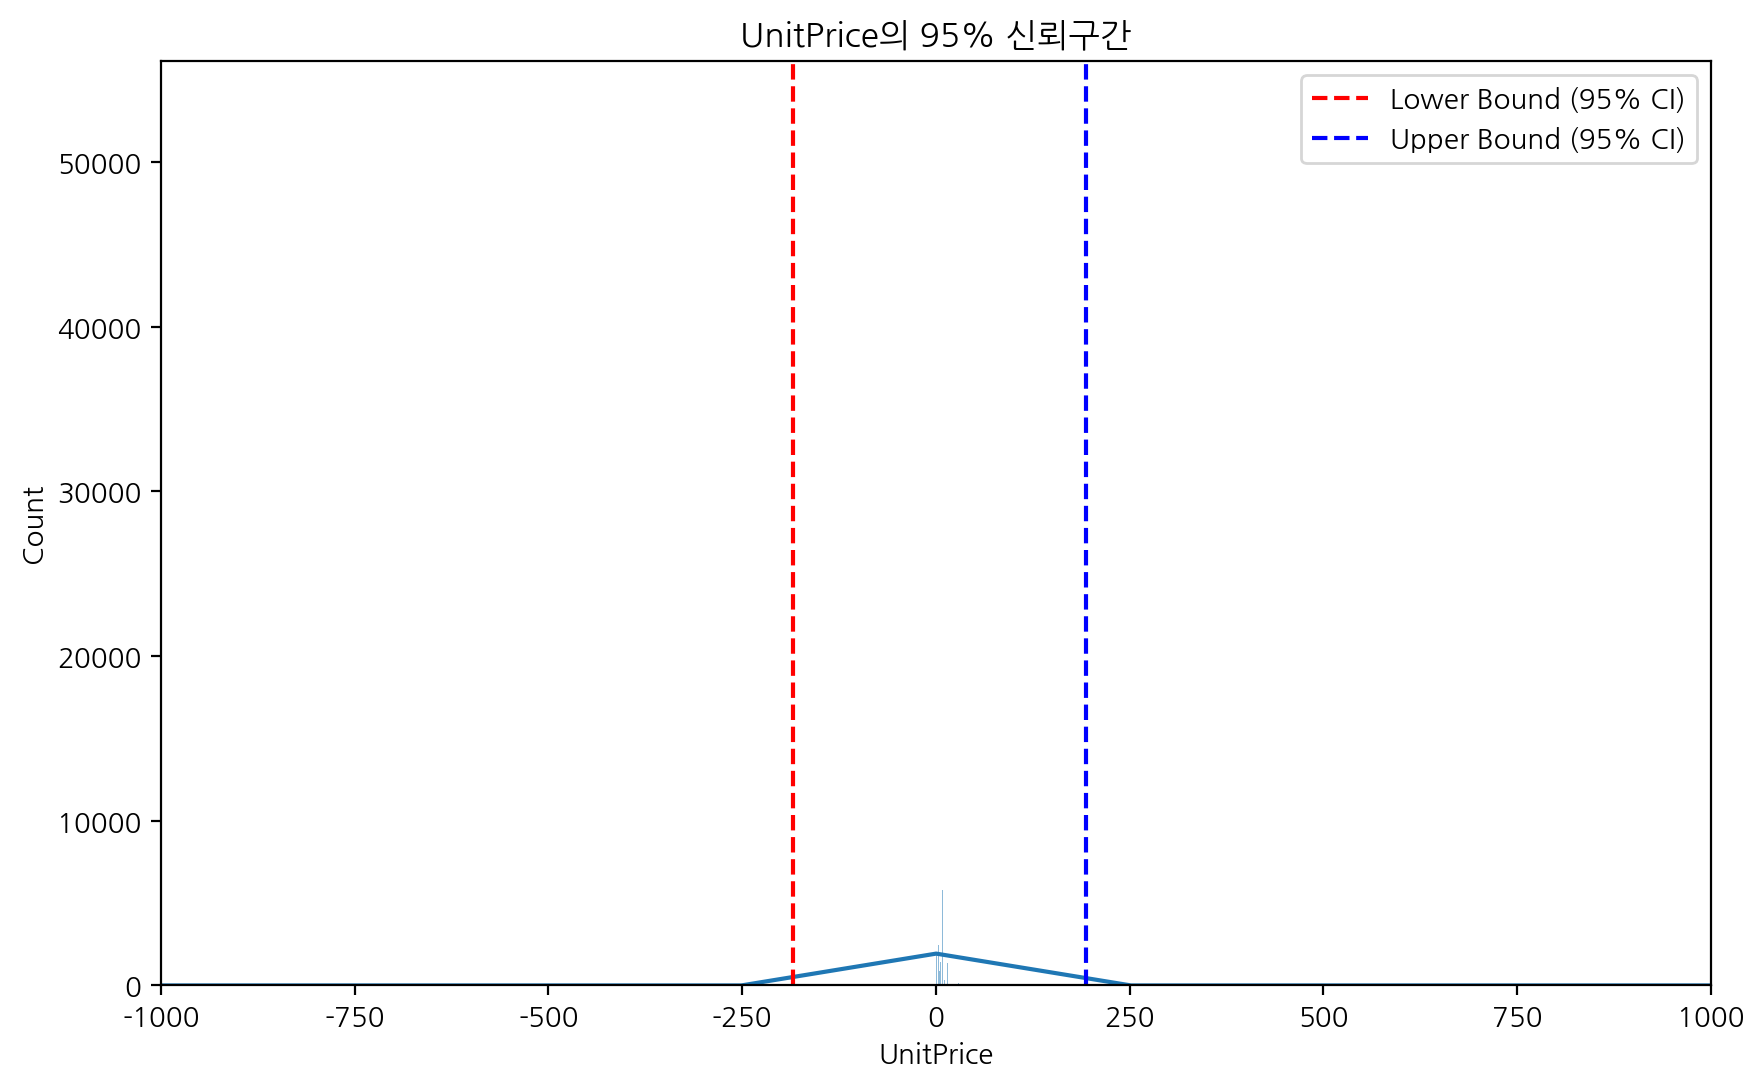

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='UnitPrice', kde=True)
plt.axvline(confidence_interval[0], color='red', linestyle='--', label='Lower Bound (95% CI)')
plt.axvline(confidence_interval[1], color='blue', linestyle='--', label='Upper Bound (95% CI)')
plt.xlim(-1000, 1000)
plt.title('UnitPrice의 95% 신뢰구간')
plt.legend()
plt.show()

- 신뢰구간
  - 95% 신뢰구간은 (-185.03, 194.26)으로 나타나며, 이는 주어진 데이터를 기반으로 UnitPrice의 평균이 특정 범위 내에 위치한다.
  - 이 범위가 큰 폭으로 퍼져 있어, 실제로 어떤 값을 가질지에 대한 정확한 예측이 어려울 수 있다.
- 비즈니스 관점에서 분석
  - 신뢰구간은 비즈니스에서 제품 가격 또는 가격 전략을 설정할 때 도움을 줄 수 있다.
    - 예를 들어, 만약 제품의 가격을 설정하거나 조정할 때 어떤 범위 내에서 안정성을 확보하고자 한다면, 이 신뢰구간을 참고하여 적절한 범위를 선택할 수 있다.
  - 비즈니스 결정에 있어서는 특히 중요한 변수들과의 관계, 경쟁 상황, 소비자 행동 등을 고려해야 한다.
    - 단일 변수의 평균만으로는 비즈니스의 복잡한 환경을 충분히 설명하기 어려울 수 있다.







